## Импорт библиотек

In [2]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

## Соединение с базой данных

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Количество просмотров страниц

In [4]:
views_query = 'SELECT uid, COUNT(*) as views_cnt FROM pageviews WHERE uid LIKE "user_%" GROUP BY uid'
views_count = pd.read_sql(views_query, connection)
views_count

,uid,views_cnt
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3
5,user_19,16
6,user_21,10
7,user_25,179
8,user_28,149
9,user_3,317


## Количество коммитов

In [5]:
commits_query = 'SELECT uid, COUNT(*) as commits_cnt FROM checker WHERE uid LIKE "user_%" AND labname != "project1" GROUP BY uid'
commits_count = pd.read_sql(commits_query, connection)
commits_count

,uid,commits_cnt
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
5,user_13,52
6,user_14,61
7,user_15,23
8,user_16,41
9,user_17,51


## Средняя разница

In [6]:
diff_query = 'SELECT uid, CAST((Julianday(test.first_commit_ts) - JulianDay(DATETIME(deadlines.deadlines, "unixepoch"))) * 24 AS INTEGER) as avg_diff FROM test LEFT JOIN deadlines ON test.labname = deadlines.labs WHERE labname != "project1"'
avg_diff = pd.read_sql(diff_query, connection)
avg_diff = avg_diff.groupby('uid').mean()
avg_diff

,avg_diff
uid,
user_1,-64.400000
user_10,-74.800000
user_14,-159.000000
user_17,-61.600000
user_18,-5.666667
user_19,-98.750000
user_21,-95.500000
user_25,-92.600000
user_28,-86.400000


## Общий датафрейм

In [7]:
main = views_count.merge(commits_count, on='uid')
main = main.merge(avg_diff, on='uid')
del main['uid']
main = main[['avg_diff', 'views_cnt', 'commits_cnt']]
main

,avg_diff,views_cnt,commits_cnt
0,-64.400000,28,62
1,-74.800000,89,20
2,-159.000000,143,61
3,-61.600000,47,51
4,-5.666667,3,5
5,-98.750000,16,118
6,-95.500000,10,65
7,-92.600000,179,79
8,-86.400000,149,60
9,-105.400000,317,18


## График

array([[<Axes: xlabel='avg_diff', ylabel='avg_diff'>,
        <Axes: xlabel='views_cnt', ylabel='avg_diff'>,
        <Axes: xlabel='commits_cnt', ylabel='avg_diff'>],
       [<Axes: xlabel='avg_diff', ylabel='views_cnt'>,
        <Axes: xlabel='views_cnt', ylabel='views_cnt'>,
        <Axes: xlabel='commits_cnt', ylabel='views_cnt'>],
       [<Axes: xlabel='avg_diff', ylabel='commits_cnt'>,
        <Axes: xlabel='views_cnt', ylabel='commits_cnt'>,
        <Axes: xlabel='commits_cnt', ylabel='commits_cnt'>]], dtype=object)

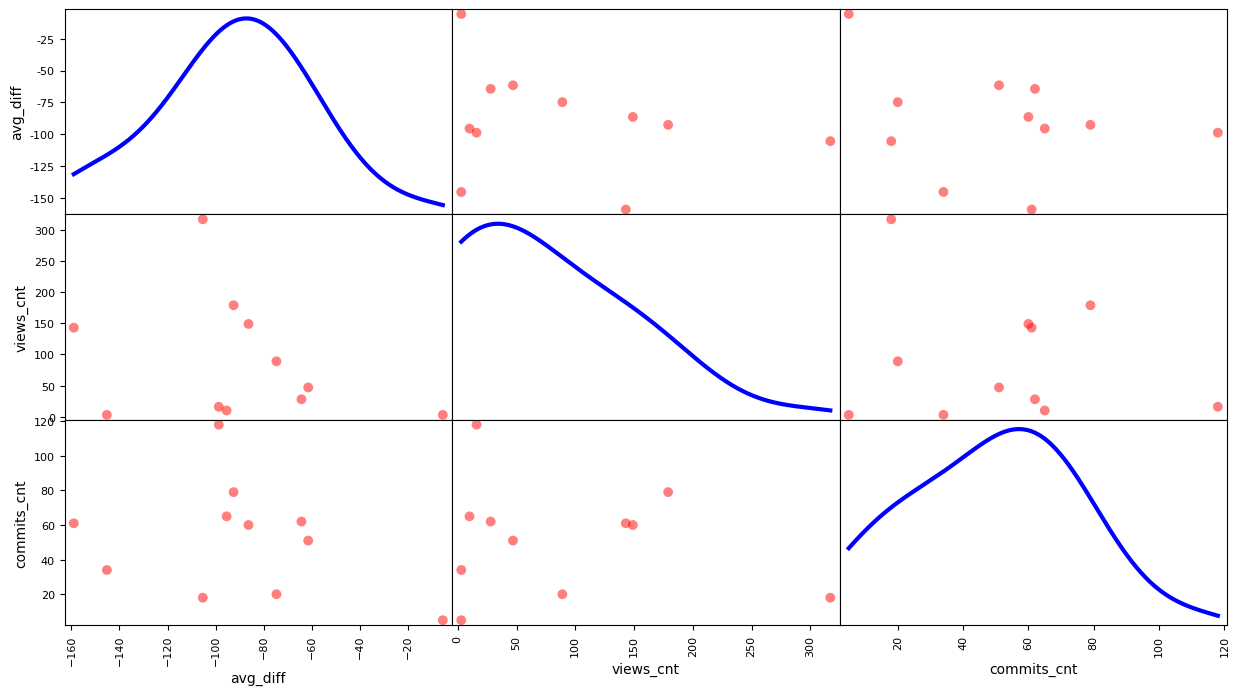

In [8]:
scatter_matrix(main, figsize=(15, 8), diagonal='kde', density_kwds=dict(color='blue', linewidth=3), s=200, color='red')

## Закрытие соединения с БД

In [9]:
connection.close()

## Можно ли сказать, что если у пользователя мало просмотров страниц, то у него, скорее всего, мало и коммитов?

### Ответ: нет

## Можем ли мы сказать, что если у пользователя мало просмотров страниц, то, скорее всего, у него небольшая средняя разница между первым коммитом и крайним сроком выполнения лабораторных работ?

### Ответ: нет

## Можем ли мы сказать, что есть много пользователей с малым количеством коммитов и несколько с большим количеством коммитов?

### Ответ: да

## Можно ли сказать, что есть много пользователей с небольшой средней разницей и несколько с большой средней разницей?

### Ответ: нет